In [45]:

# Numpy: 提供数组支持
import numpy as np

# SciPy: 提供矩阵支持，科学计算
import scipy

# Matplotlib: 可视化工具
import matplotlib.pyplot as plt

# Pandas: 数据DataFrame
import pandas as pd

#导入随机森林
from sklearn.ensemble import RandomForestClassifier


# Seaborn: Python可视化库
import seaborn as sns

In [46]:
data = pd.read_csv('../../data/happiness_train_abbr.csv', encoding='utf-8', encoding_errors='ignore')
data.info()
#设置索引
data.set_index('id', inplace=True)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8000 non-null   int64  
 1   happiness        8000 non-null   int64  
 2   survey_type      8000 non-null   int64  
 3   province         8000 non-null   int64  
 4   city             8000 non-null   int64  
 5   county           8000 non-null   int64  
 6   survey_time      8000 non-null   object 
 7   gender           8000 non-null   int64  
 8   birth            8000 non-null   int64  
 9   nationality      8000 non-null   int64  
 10  religion         8000 non-null   int64  
 11  religion_freq    8000 non-null   int64  
 12  edu              8000 non-null   int64  
 13  income           8000 non-null   int64  
 14  political        8000 non-null   int64  
 15  floor_area       8000 non-null   float64
 16  height_cm        8000 non-null   int64  
 17  weight_jin    

,happiness,survey_type,province,city,county,gender,birth,nationality,religion,religion_freq,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.00000,8000.000000,8000.000000,...,7.999000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000
mean,3.850125,1.405500,15.155375,42.564750,70.619000,1.53000,1964.707625,1.37350,0.772250,1.427250,...,6.776050e+04,2.882500,2.595875,1.063625,1.817125,3.234375,2.226125,1.702500,3.30350,1.094875
std,0.938228,0.491019,8.917100,27.187404,38.747503,0.49913,16.842865,1.52882,1.071459,1.408441,...,2.909591e+05,1.521835,1.077011,0.789402,0.511825,1.423182,0.971525,0.976147,1.98132,3.410180
min,-8.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1921.000000,-8.00000,-8.000000,-8.000000,...,-3.000000e+00,-3.000000,-8.000000,-3.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.00000,-8.000000
25%,4.000000,1.000000,7.000000,18.000000,37.000000,1.00000,1952.000000,1.00000,1.000000,1.000000,...,1.300000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.00000,2.000000
50%,4.000000,1.000000,15.000000,42.000000,73.000000,2.00000,1965.000000,1.00000,1.000000,1.000000,...,3.800000e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.00000,2.000000
75%,4.000000,2.000000,22.000000,65.000000,104.000000,2.00000,1977.000000,1.00000,1.000000,1.000000,...,7.000000e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.00000,3.000000
max,5.000000,2.000000,31.000000,89.000000,134.000000,2.00000,1997.000000,8.00000,1.000000,9.000000,...,9.999992e+06,50.000000,5.000000,30.000000,2.000000,7.000000,3.000000,3.000000,5.00000,4.000000


## 对survey_time 进行处理

In [47]:
data.survey_time = pd.to_datetime(data.survey_time)
data.survey_time.describe()
data['survey_time'] = (data['survey_time'] - pd.Timestamp('1970-01-01'))// pd.Timedelta('1D')

# 缺失值处理

In [48]:
data.replace(-8, np.nan, inplace=True)
data.replace(-3, np.nan, inplace=True)
data.replace(-2, np.nan, inplace=True)
data.replace(-1, np.nan, inplace=True)
data.isnull().sum()

happiness            12
survey_type           0
province              0
city                  0
county                0
survey_time           0
gender                0
birth                 0
nationality          18
religion            108
religion_freq        15
edu                  11
income              441
political            41
floor_area            0
height_cm             0
weight_jin            0
health                5
health_problem       43
depression           16
hukou                 0
socialize             6
relax                17
learn                21
equity               42
class                81
work_exper            0
work_status        5074
work_yr            5207
work_type          5117
work_manage        5108
family_income       667
family_m             22
family_status        46
house               118
car                  10
marital               0
status_peer          49
status_3_before      48
view                208
inc_ability         965
dtype: int64

In [49]:
data.dropna(subset=['happiness'],inplace=True)
data['happiness'].isnull().sum()

0

In [50]:
data.isnull().sum()

happiness             0
survey_type           0
province              0
city                  0
county                0
survey_time           0
gender                0
birth                 0
nationality          18
religion            104
religion_freq        15
edu                   9
income              434
political            39
floor_area            0
height_cm             0
weight_jin            0
health                3
health_problem       41
depression           14
hukou                 0
socialize             4
relax                15
learn                19
equity               39
class                76
work_exper            0
work_status        5065
work_yr            5198
work_type          5108
work_manage        5099
family_income       659
family_m             21
family_status        42
house               115
car                   8
marital               0
status_peer          46
status_3_before      45
view                203
inc_ability         959
dtype: int64

In [51]:
hava_work_data = data.copy()
data[['work_exper','work_manage','work_status','work_type','work_yr']].corrwith(data['happiness'],method='spearman')

work_exper     0.020238
work_manage   -0.103015
work_status   -0.056026
work_type     -0.059035
work_yr       -0.033845
dtype: float64

In [52]:
data.drop(['work_exper','work_manage','work_status','work_type','work_yr'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7988 entries, 1 to 8000
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   happiness        7988 non-null   float64
 1   survey_type      7988 non-null   int64  
 2   province         7988 non-null   int64  
 3   city             7988 non-null   int64  
 4   county           7988 non-null   int64  
 5   survey_time      7988 non-null   int64  
 6   gender           7988 non-null   int64  
 7   birth            7988 non-null   int64  
 8   nationality      7970 non-null   float64
 9   religion         7884 non-null   float64
 10  religion_freq    7973 non-null   float64
 11  edu              7979 non-null   float64
 12  income           7554 non-null   float64
 13  political        7949 non-null   float64
 14  floor_area       7988 non-null   float64
 15  height_cm        7988 non-null   int64  
 16  weight_jin       7988 non-null   int64  
 17  health           79

In [9]:
#回滚
# old_data=data.copy()

# data = old_data
# 缺失值填充后数据 = data 


In [53]:
# 缺失值填充
from sklearn.impute import KNNImputer
impute = KNNImputer()
for i in  data.select_dtypes(include="number").columns:
    data[i]=impute.fit_transform(data[[i]])
data.isnull().sum()
old_data=data.copy()

In [54]:
# data = 缺失值填充后数据
for i in data.select_dtypes('float64').columns:
    if i in ['income','floor_area','height_cm','weight_jin','family_income']:
        continue
    data[i] = data[i].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7988 entries, 1 to 8000
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   happiness        7988 non-null   int64  
 1   survey_type      7988 non-null   int64  
 2   province         7988 non-null   int64  
 3   city             7988 non-null   int64  
 4   county           7988 non-null   int64  
 5   survey_time      7988 non-null   int64  
 6   gender           7988 non-null   int64  
 7   birth            7988 non-null   int64  
 8   nationality      7988 non-null   int64  
 9   religion         7988 non-null   int64  
 10  religion_freq    7988 non-null   int64  
 11  edu              7988 non-null   int64  
 12  income           7988 non-null   float64
 13  political        7988 non-null   int64  
 14  floor_area       7988 non-null   float64
 15  height_cm        7988 non-null   float64
 16  weight_jin       7988 non-null   float64
 17  health           79

# 数据可视化

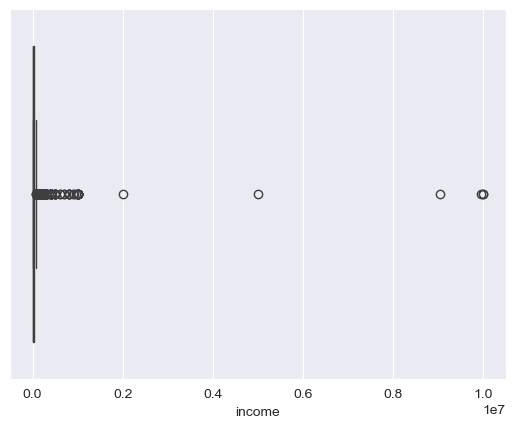

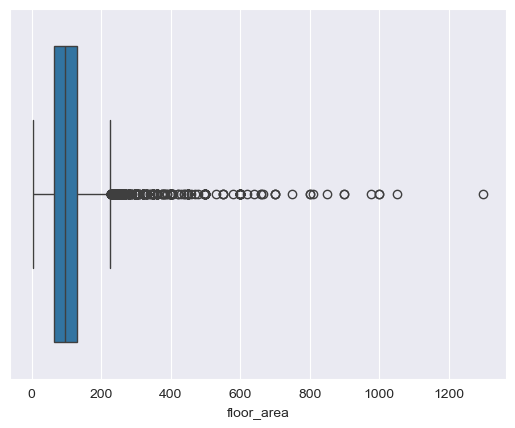

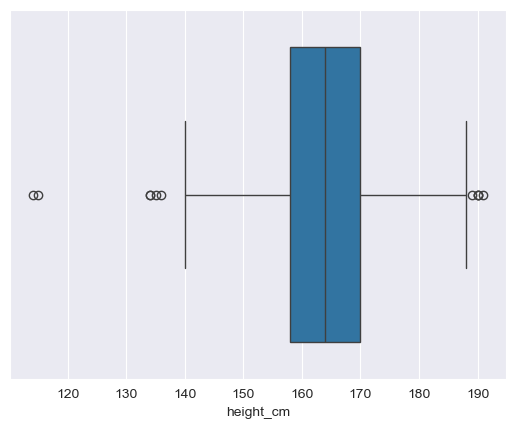

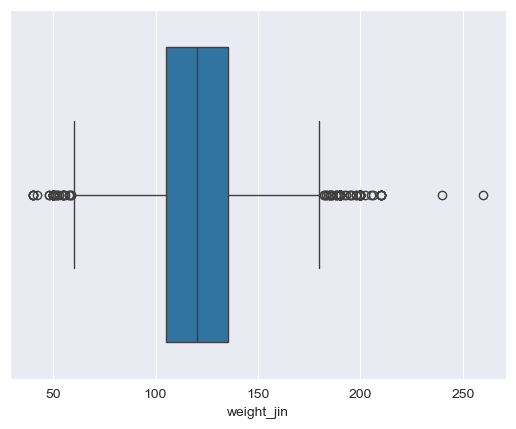

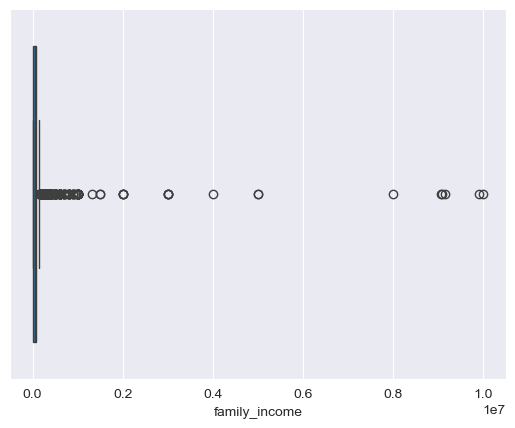

In [12]:
for i in data.select_dtypes(include="float64").columns :
    sns.boxplot(data , x=i)
    plt.show()

In [13]:
# for i in data.select_dtypes('int64').columns:
#     sns.histplot(data[i])
#     plt.title = i
#     plt.show()

# 处理连续变量的离群值

count       7988.0
mean       35259.6
std       233020.3
min            0.0
25%         3600.0
50%        20000.0
75%        36000.0
max      9999990.0
Name: income, dtype: float64


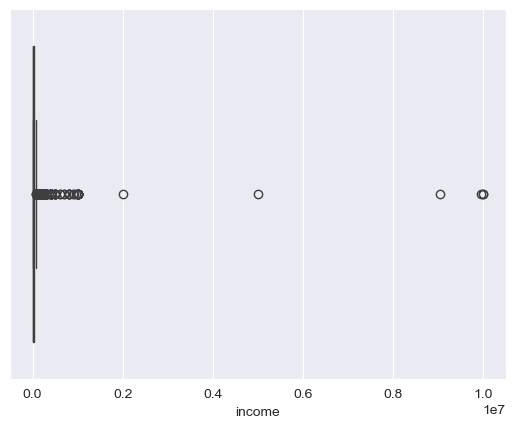

In [14]:
#连续变量有'income','floor_area','height_cm','weight_jin','family_income'
sns.boxplot(data,x='income')
print(data['income'].describe().round(1))
plt.show()

In [15]:
# 替换不正常的值，最大为第 95%的数据
# upper = data['income'].quantile(0.95)
# data['income'].clip(upper=upper,inplace=True)
# print(data['income'].describe())
# sns.boxplot(x=data['income'])
# plt.show()
old2_data = data

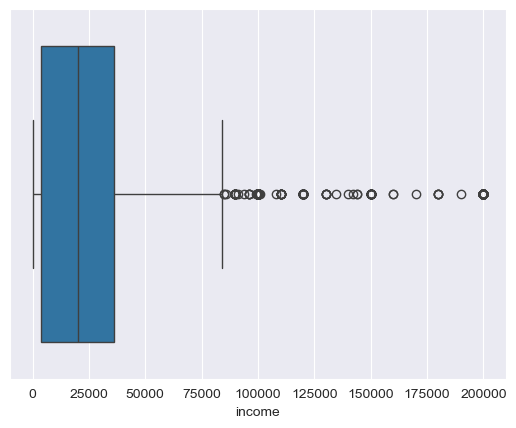

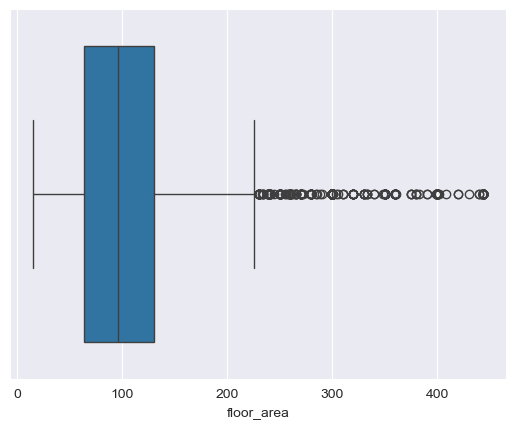

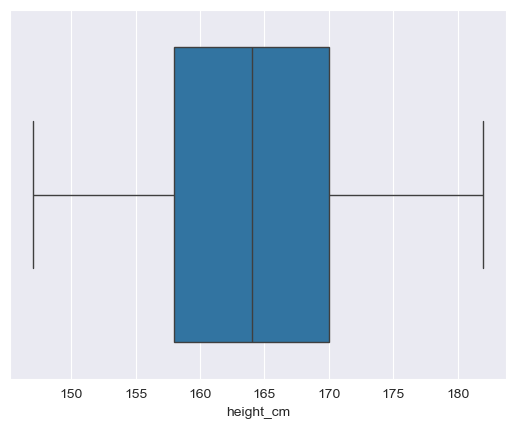

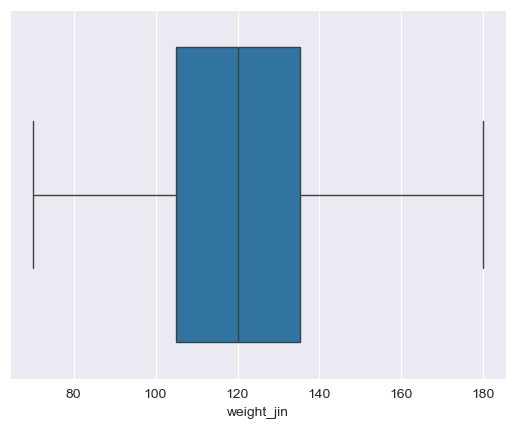

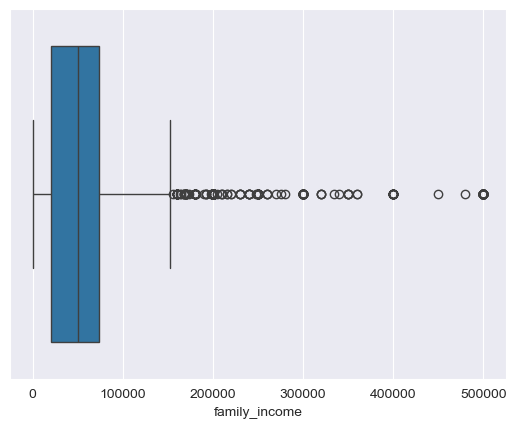

In [55]:
#换！
data = old2_data
for i in ['income','floor_area','height_cm','weight_jin','family_income']:
    upper = data[i].quantile(0.99)
    lower = data[i].quantile(0.01)
    data[i].clip(upper=upper,lower=lower,inplace=True)
    sns.boxplot(data,x=i)
    plt.show()

# 处理离散变量离群值

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7988 entries, 1 to 8000
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   happiness        7988 non-null   int64         
 1   survey_type      7988 non-null   int64         
 2   province         7988 non-null   int64         
 3   city             7988 non-null   int64         
 4   county           7988 non-null   int64         
 5   survey_time      7988 non-null   datetime64[ns]
 6   gender           7988 non-null   int64         
 7   birth            7988 non-null   int64         
 8   nationality      7988 non-null   int64         
 9   religion         7988 non-null   int64         
 10  religion_freq    7988 non-null   int64         
 11  edu              7988 non-null   int64         
 12  income           7988 non-null   float64       
 13  political        7988 non-null   int64         
 14  floor_area       7988 non-null   float64     

count    7988.000000
mean        2.877441
std         1.364791
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: family_m, dtype: float64


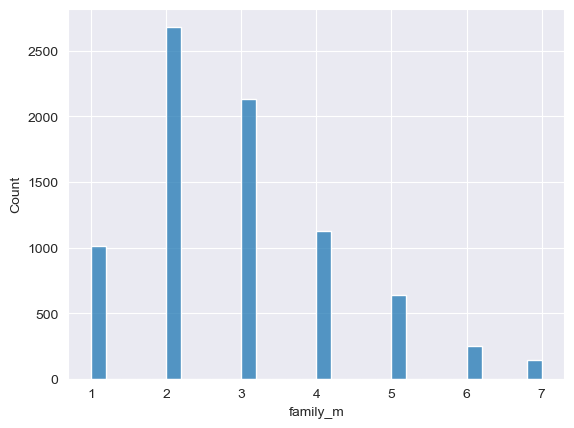

count    7988.000000
mean        1.095769
std         0.510284
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: house, dtype: float64


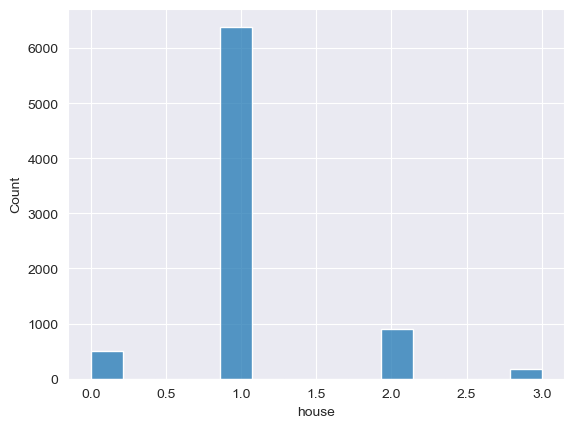

In [56]:
#family_m,house 是离散变量
for i in ['family_m','house']:
    upper = data[i].quantile(0.99)
    lower = data[i].quantile(0.01)
    data[i].clip(lower=lower,upper=upper,inplace=True)
    print(data[i].describe())
    sns.histplot(data[i])
    plt.show()

In [64]:
# 导出数据集
data.to_csv('../../data/processed.csv',index=True)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# old3_data = data
# data['survey_time'] = (data['survey_time'] - pd.Timestamp('1970-01-01'))// pd.Timedelta('1D')
# 使用随机森林进行分类
x = data.drop('happiness',axis=1)
y = data['happiness']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
clf = RandomForestClassifier(n_estimators=100,random_state=42)
y_pred = clf.fit(X_train,y_train).predict(X_test)
print('准确率:',clf.score(X_test,y_test))
print('报告:',classification_report(y_test,y_pred))
# data = old3_data

准确率: 0.6226533166458073
报告:               precision    recall  f1-score   support

           1       0.67      0.11      0.19        18
           2       0.37      0.10      0.16        99
           3       0.46      0.09      0.15       233
           4       0.63      0.97      0.77       969
           5       0.57      0.09      0.16       279

    accuracy                           0.62      1598
   macro avg       0.54      0.27      0.29      1598
weighted avg       0.58      0.62      0.53      1598

